In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Creating Dataframe

In [11]:
df_train=pd.read_csv('Data/train_data.txt',sep=':::',header=None,engine='python')
df_train.columns=['Id','Title','Genre','Description']
df_train.head()

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [12]:
df_test=pd.read_csv('Data/test_data.txt',sep=':::',header=None,engine='python')
df_test.columns=['Id','Title','Description']
df_test.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


## Preprocessing

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [14]:
df_train.nunique()

Id             54214
Title          54214
Genre             27
Description    54086
dtype: int64

In [15]:
le=LabelEncoder()
encoded_genres=le.fit_transform(df_train.Genre)
df_train['Encoded Genres']=encoded_genres
df_train.head()

,Id,Title,Genre,Description,Encoded Genres
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


## Visualization

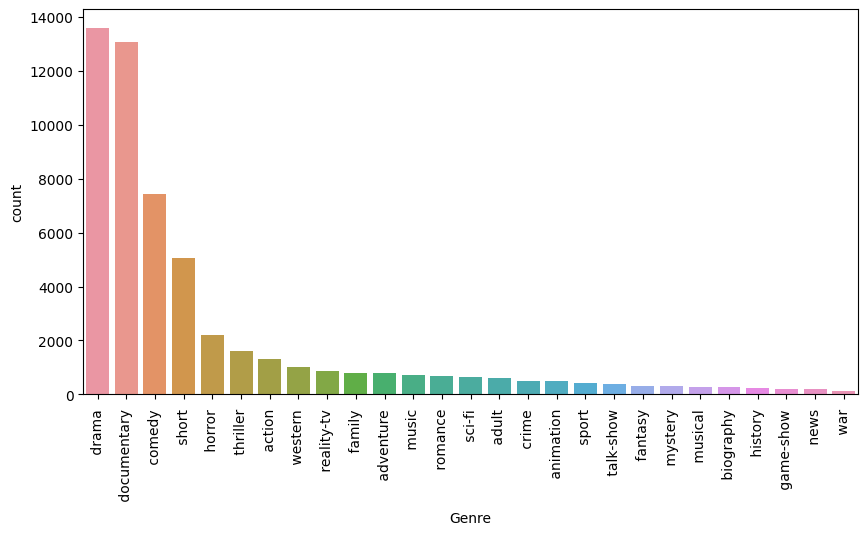

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_train.Genre.value_counts().index,y=df_train.Genre.value_counts())
plt.xticks(rotation=90)
plt.show()

## Data Cleaning

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [18]:
# nltk.download('stopwords') 
# nltk.download('punkt')

In [19]:
def clean(text):
  text=text.lower()
  text=word_tokenize(text)
  tokens=[word for word in text if word.isalnum()]
  stopwords_list=set(stopwords.words('english'))
  tokens=[word for word in tokens if word not in stopwords_list]
  stemmer=PorterStemmer()
  tokens=[stemmer.stem(word) for word in tokens]
  cleaned_text=' '.join(tokens)
  return cleaned_text

df_train['Cleaned Description']=df_train.Description.apply(clean)

In [20]:
df_train.head()

,Id,Title,Genre,Description,Encoded Genres,Cleaned Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listen convers doctor parent oscar learn nobod...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestu relationship curre...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bu empti student field trip museum natur histo...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemploy father make end meet edith twin ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film titl refer bodi ground zero also state na...


In [21]:
#Calculate the length of each description earlier and after cleaning
df_train['Description Length']=df_train.Description.apply(lambda x:len(x))
df_train['Cleaned Description Length']=df_train['Cleaned Description'].apply(lambda x:len(x))

In [22]:
df_train.head()

,Id,Title,Genre,Description,Encoded Genres,Cleaned Description,Description Length,Cleaned Description Length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listen convers doctor parent oscar learn nobod...,546,316
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestu relationship curre...,184,111
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bu empti student field trip museum natur histo...,650,330
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemploy father make end meet edith twin ...,1082,664
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film titl refer bodi ground zero also state na...,625,340


<Figure size 1000x500 with 0 Axes>

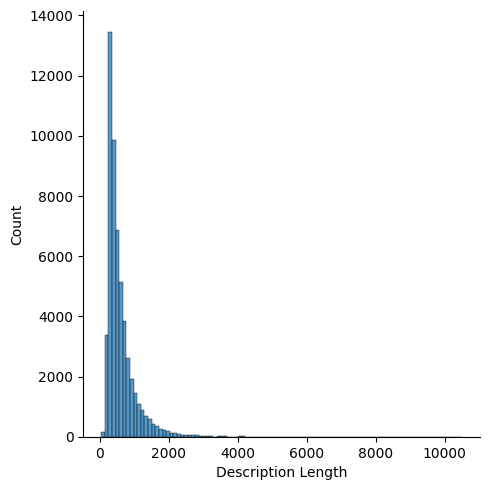

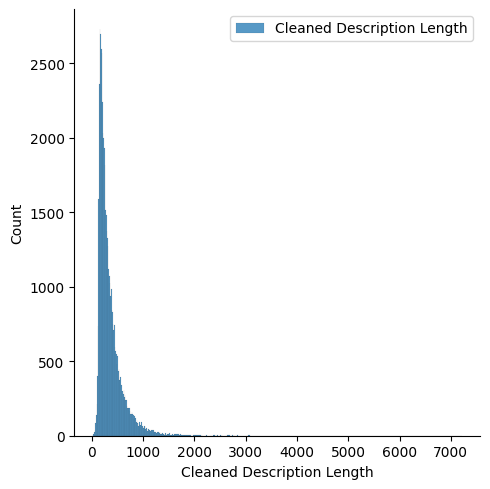

In [23]:
#plot the distribution of description length and cou
plt.figure(figsize=(10,5))
sns.displot(df_train['Description Length'],label='Description Length',bins=100)
sns.displot(df_train['Cleaned Description Length'],label='Cleaned Description Length')
plt.legend()
plt.show()

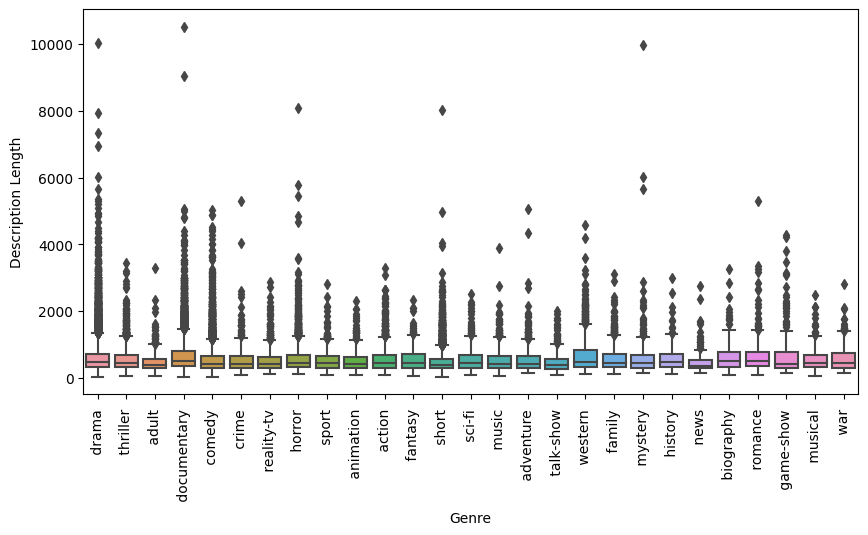

In [24]:
#Outlier detection using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df_train,x='Genre',y='Description Length')
plt.xticks(rotation=90)
plt.show()

In [25]:
(df_train['Cleaned Description Length']>2000).value_counts()

Cleaned Description Length
False    54104
True       110
Name: count, dtype: int64

In [26]:
#Remove the description with length greater than 2000
df_train=df_train[df_train['Cleaned Description Length']<2000]
df_train.shape

(54104, 8)

In [27]:
df_train.head()

,Id,Title,Genre,Description,Encoded Genres,Cleaned Description,Description Length,Cleaned Description Length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listen convers doctor parent oscar learn nobod...,546,316
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestu relationship curre...,184,111
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bu empti student field trip museum natur histo...,650,330
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemploy father make end meet edith twin ...,1082,664
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film titl refer bodi ground zero also state na...,625,340


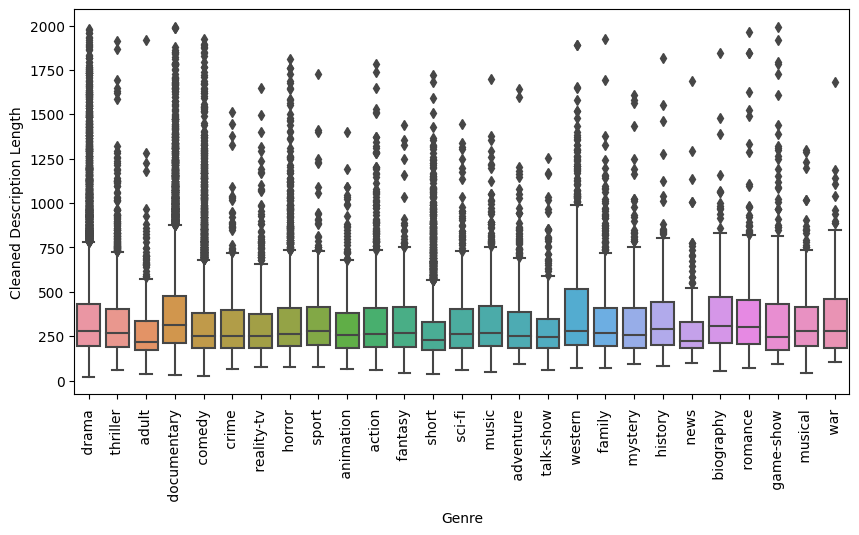

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_train,x='Genre',y='Cleaned Description Length')
plt.xticks(rotation=90)
plt.show()

# Text Vectorization

In [29]:
X=df_train['Cleaned Description']
y=df_train['Encoded Genres']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,2))
X=tfidf.fit_transform(X).toarray()

X.shape

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

## Building Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,classification_report

lr=LogisticRegression()
clf=OneVsRestClassifier(lr)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

Accuracy Score: 0.581277146289622


## Predicting on Test Data

In [32]:
df_test['Cleaned Description']=df_test.Description.apply(clean)
X_test=df_test['Cleaned Description']
X_test=tfidf.transform(X_test).toarray()
y_pred=clf.predict(X_test)
y_pred=le.inverse_transform(y_pred)
df_test['Predicted Genre']=y_pred
df_test.head()

,Id,Title,Description,Cleaned Description,Predicted Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane love life car apart job especi girlfrien...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico naughti child three bel...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die spoken brother 10 year seriou cance...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...,drama


In [33]:
df_test[['Title','Description','Predicted Genre']].to_csv('predicted_genres.csv',index=False)